In [51]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats
from sklearn.linear_model import Lasso

###Carga de datos

In [5]:
# Read the Excel file
data_df = pd.read_excel("data.xls")

# Display the first few rows of the DataFrame
data_df.head()

column_names = ["ID", "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "default payment next month"]

# Asignar los nombres de las columnas al DataFrame
data_df.columns = column_names

# Mostrar las primeras filas del DataFrame
data_df.head()

# Quitar la primera fila del DataFrame
data_df = data_df.drop(index=0)

# Mostrar las primeras filas del DataFrame actualizado
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [23]:
data_df = data_df.apply(pd.to_numeric, errors='coerce')

# Mostrar los tipos de datos después de la conversión
print(data_df.dtypes)

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


## Tarea 3: Exploracion de datos



>3.1 Analisis datos numéricos

>3.2 Analisis variables categóricos/cualitativas

>3.3 Búsqueda de relaciones entre las variables d

>3.4 Datos atipicos



### 3.1 Análisis datos numéricos


lIMIT BALL

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64


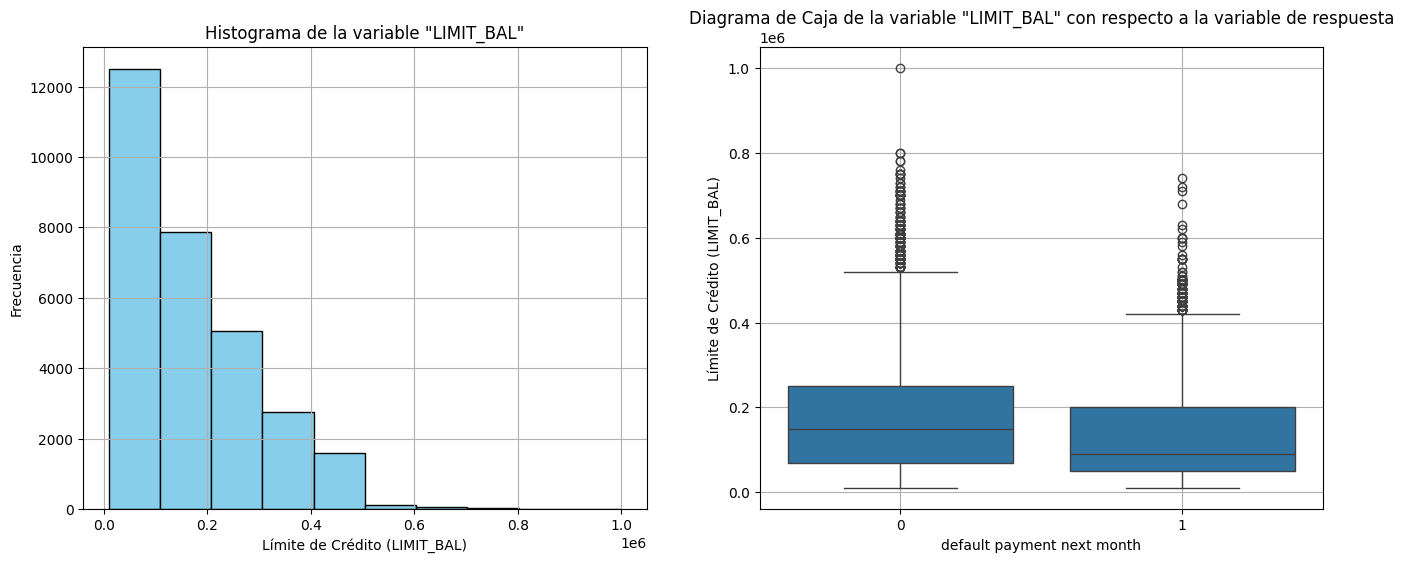

Porcentaje de valores atípicos en LIMIT_BAL: 0.5566666666666666 %


In [25]:
# Descripción de la variable 'LIMIT_BAL'
limit_bal_description = data_df['LIMIT_BAL'].describe()
print(limit_bal_description)

# Histograma y Boxplot de la variable 'LIMIT_BAL'
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(data_df['LIMIT_BAL'], color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "LIMIT_BAL"')
plt.xlabel('Límite de Crédito (LIMIT_BAL)')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=data_df)
plt.xlabel('default payment next month')
plt.ylabel('Límite de Crédito (LIMIT_BAL)')
plt.title('Diagrama de Caja de la variable "LIMIT_BAL" con respecto a la variable de respuesta')
plt.grid(True)

plt.show()

# Calcular el porcentaje de valores atípicos en LIMIT_BAL
Q1, Q3 = data_df['LIMIT_BAL'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_percentage = ((data_df['LIMIT_BAL'] < lower_bound) | (data_df['LIMIT_BAL'] > upper_bound)).mean() * 100

print("Porcentaje de valores atípicos en LIMIT_BAL:", outliers_percentage, "%")


Edad

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64


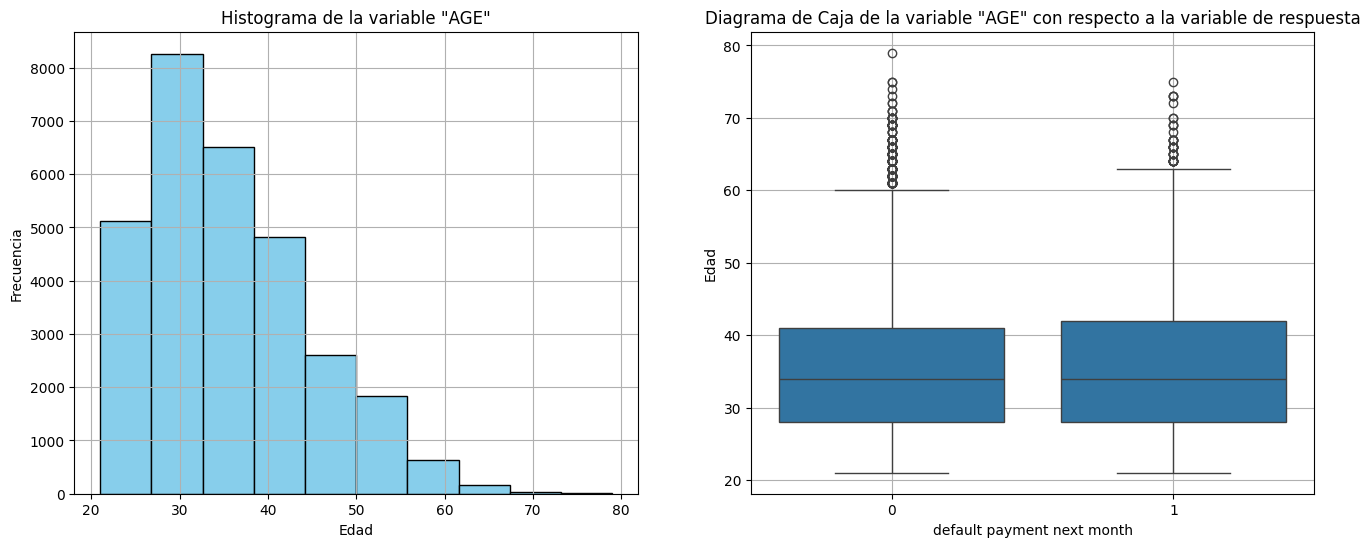

Porcentaje de valores atípicos en AGE: 0.9066666666666667 %


In [26]:
# Descripción de la variable 'AGE'
age_description = data_df['AGE'].describe()
print(age_description)

# Histograma y Boxplot de la variable 'AGE'
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(data_df['AGE'], color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "AGE"')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(x='default payment next month', y='AGE', data=data_df)
plt.xlabel('default payment next month')
plt.ylabel('Edad')
plt.title('Diagrama de Caja de la variable "AGE" con respecto a la variable de respuesta')
plt.grid(True)

plt.show()

# Calcular el porcentaje de valores atípicos en AGE
Q1, Q3 = data_df['AGE'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_percentage = ((data_df['AGE'] < lower_bound) | (data_df['AGE'] > upper_bound)).mean() * 100

print("Porcentaje de valores atípicos en AGE:", outliers_percentage, "%")

Atrasos pagos

count    30000.000000
mean        -0.016700
std          1.123802
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_0, dtype: float64


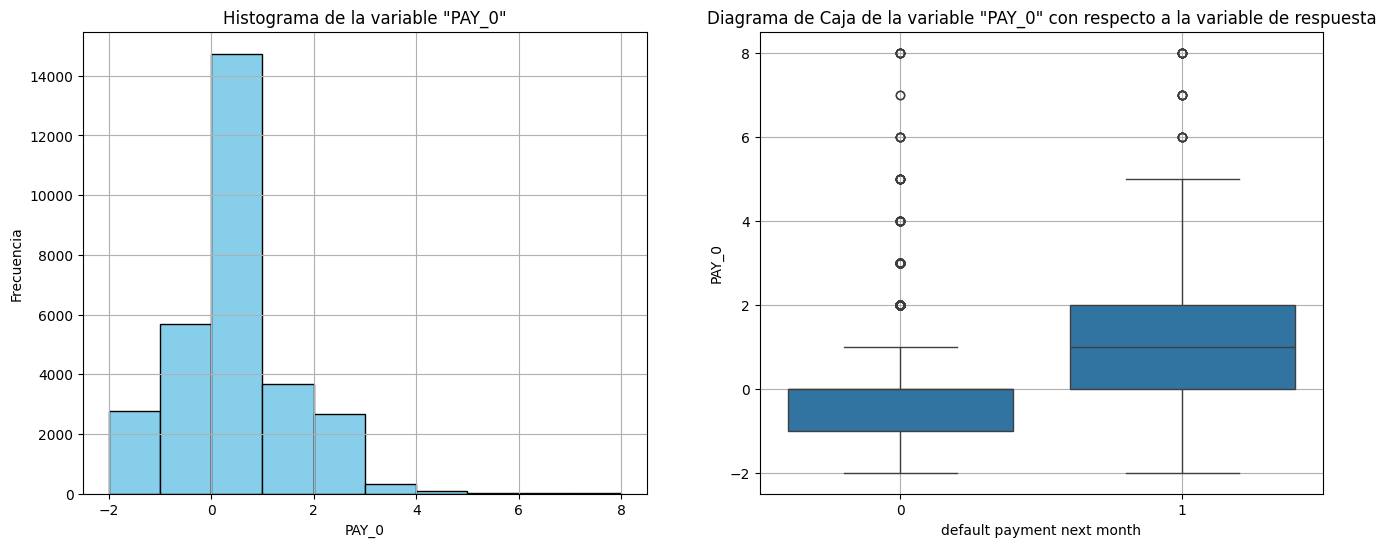

Porcentaje de valores atípicos en PAY_0: 10.433333333333334 %
count    30000.000000
mean        -0.133767
std          1.197186
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_2, dtype: float64


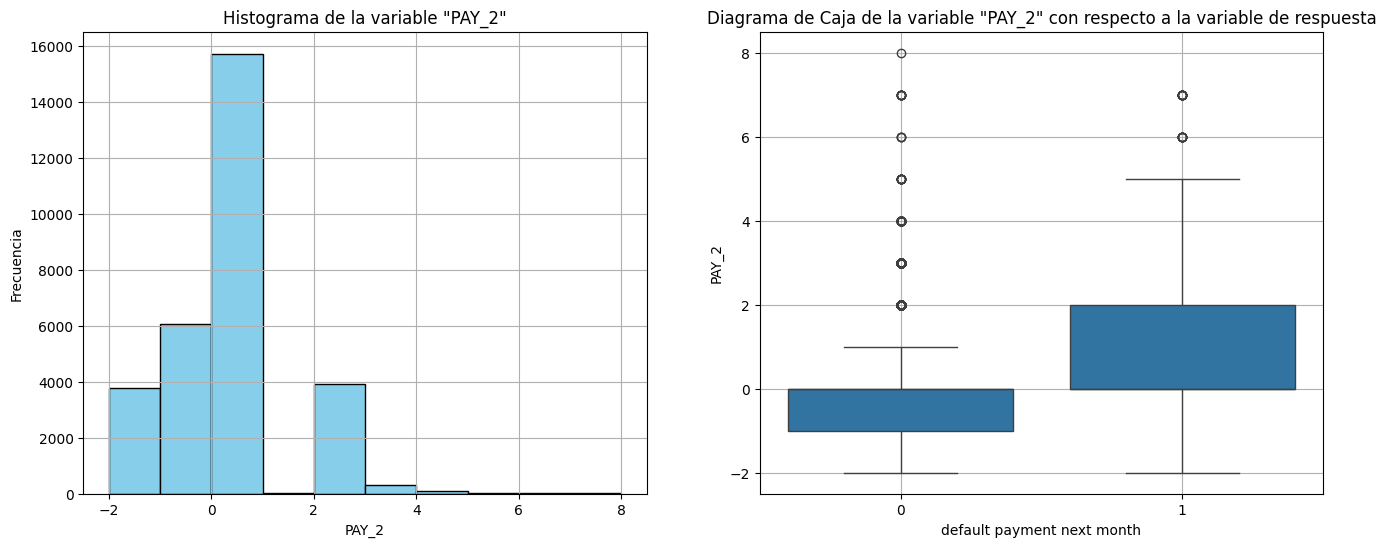

Porcentaje de valores atípicos en PAY_2: 14.7 %
count    30000.000000
mean        -0.166200
std          1.196868
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_3, dtype: float64


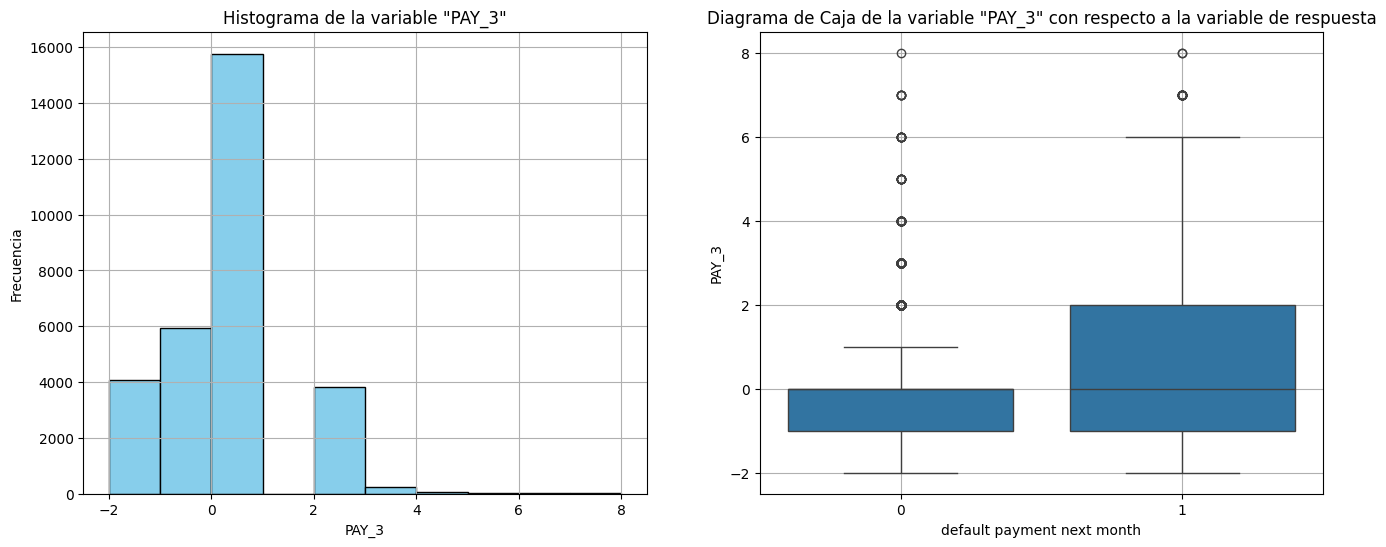

Porcentaje de valores atípicos en PAY_3: 14.030000000000001 %
count    30000.000000
mean        -0.220667
std          1.169139
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_4, dtype: float64


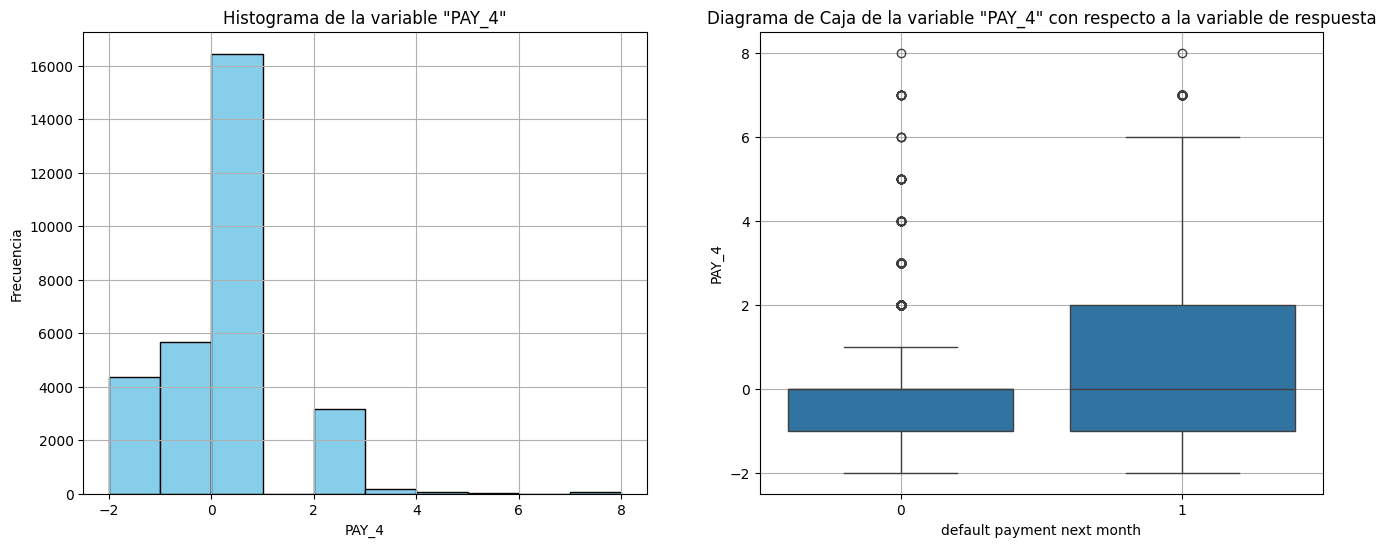

Porcentaje de valores atípicos en PAY_4: 11.693333333333333 %
count    30000.000000
mean        -0.266200
std          1.133187
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_5, dtype: float64


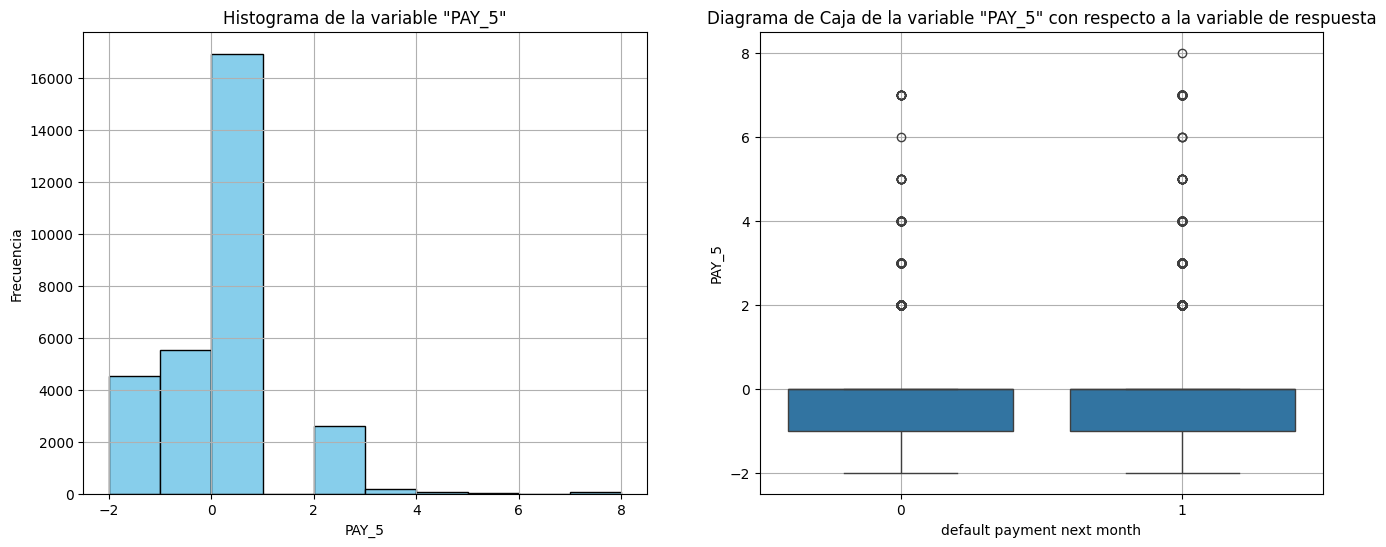

Porcentaje de valores atípicos en PAY_5: 9.893333333333333 %
count    30000.000000
mean        -0.291100
std          1.149988
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_6, dtype: float64


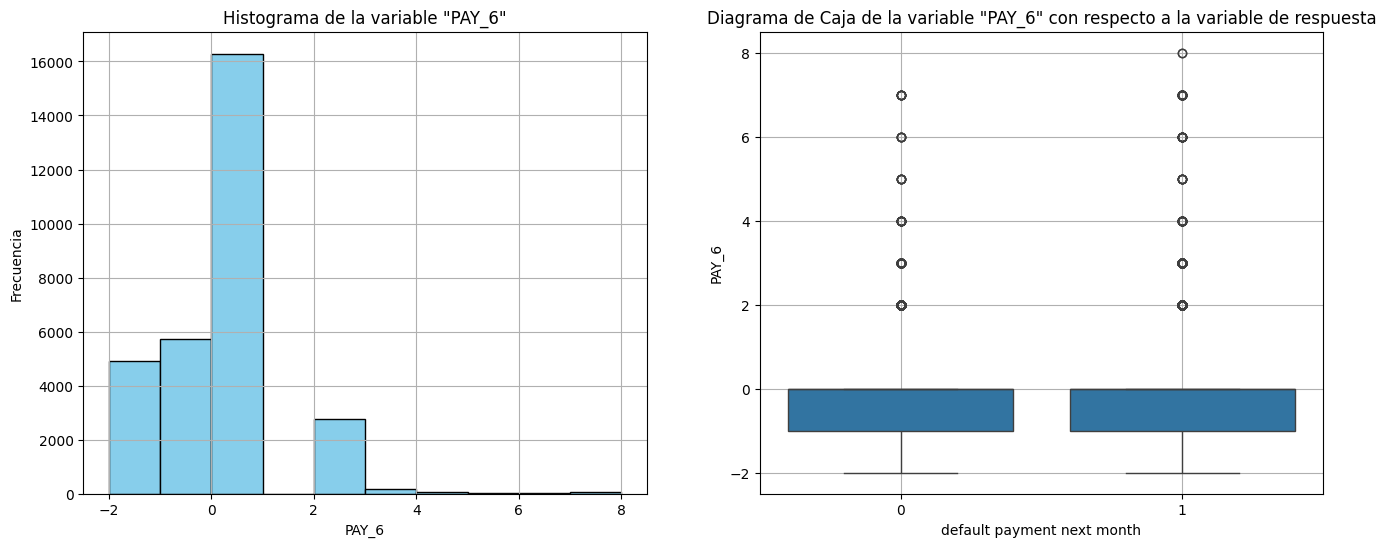

Porcentaje de valores atípicos en PAY_6: 10.263333333333332 %


In [24]:
# Iterar sobre las variables 'PAY_0' a 'PAY_6'
pay_vars = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for pay_var in pay_vars:
    # Descripción de la variable
    pay_description = data_df[pay_var].describe()
    print(pay_description)

    # Histograma y Boxplot de la variable
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.hist(data_df[pay_var], color='skyblue', edgecolor='black')
    plt.title(f'Histograma de la variable "{pay_var}"')
    plt.xlabel(f'{pay_var}')
    plt.ylabel('Frecuencia')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    sns.boxplot(x='default payment next month', y=pay_var, data=data_df)
    plt.xlabel('default payment next month')
    plt.ylabel(f'{pay_var}')
    plt.title(f'Diagrama de Caja de la variable "{pay_var}" con respecto a la variable de respuesta')
    plt.grid(True)
    plt.show()

    # Calcular el porcentaje de valores atípicos
    Q1, Q3 = data_df[pay_var].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_percentage = ((data_df[pay_var] < lower_bound) | (data_df[pay_var] > upper_bound)).mean() * 100

    print(f"Porcentaje de valores atípicos en {pay_var}:", outliers_percentage, "%")



Cantidad a pagar 

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64


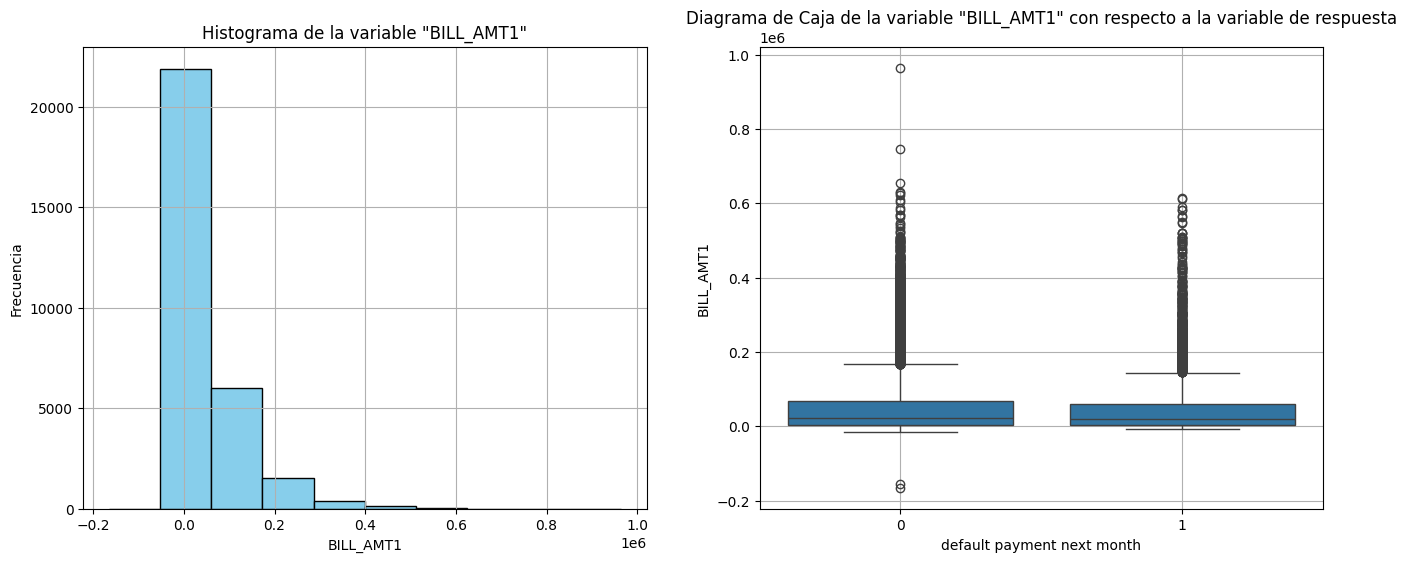

Porcentaje de valores atípicos en BILL_AMT1: 8.0 %
count     30000.000000
mean      49179.075167
std       71173.768783
min      -69777.000000
25%        2984.750000
50%       21200.000000
75%       64006.250000
max      983931.000000
Name: BILL_AMT2, dtype: float64


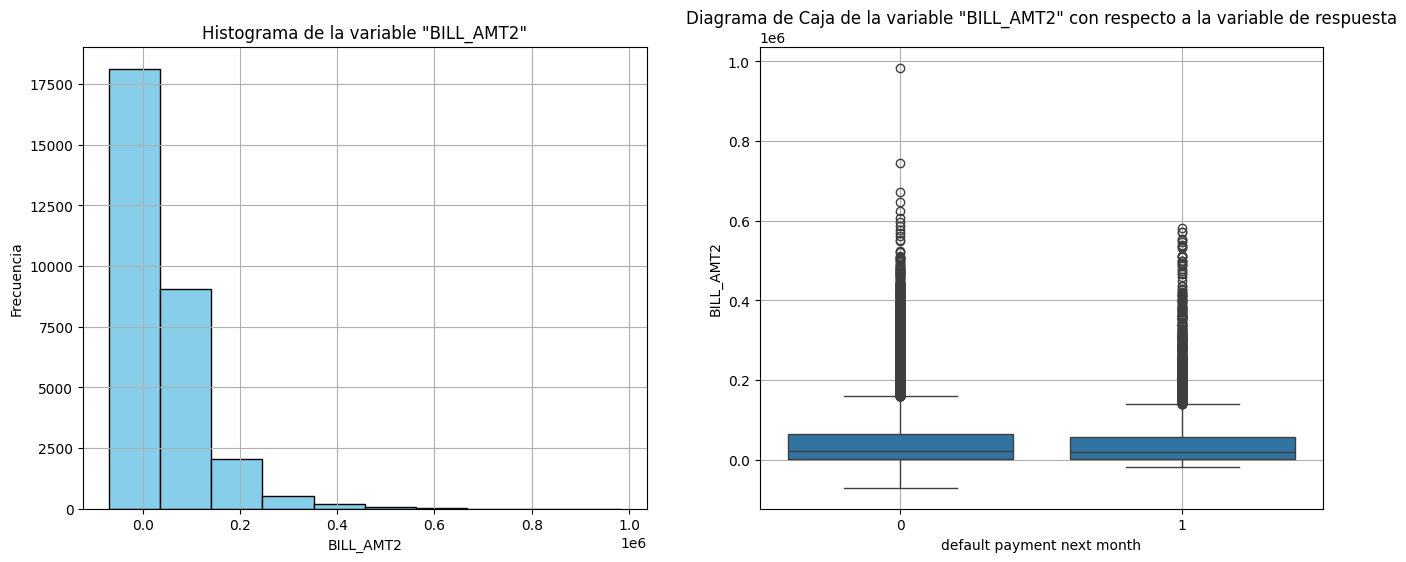

Porcentaje de valores atípicos en BILL_AMT2: 7.983333333333334 %
count    3.000000e+04
mean     4.701315e+04
std      6.934939e+04
min     -1.572640e+05
25%      2.666250e+03
50%      2.008850e+04
75%      6.016475e+04
max      1.664089e+06
Name: BILL_AMT3, dtype: float64


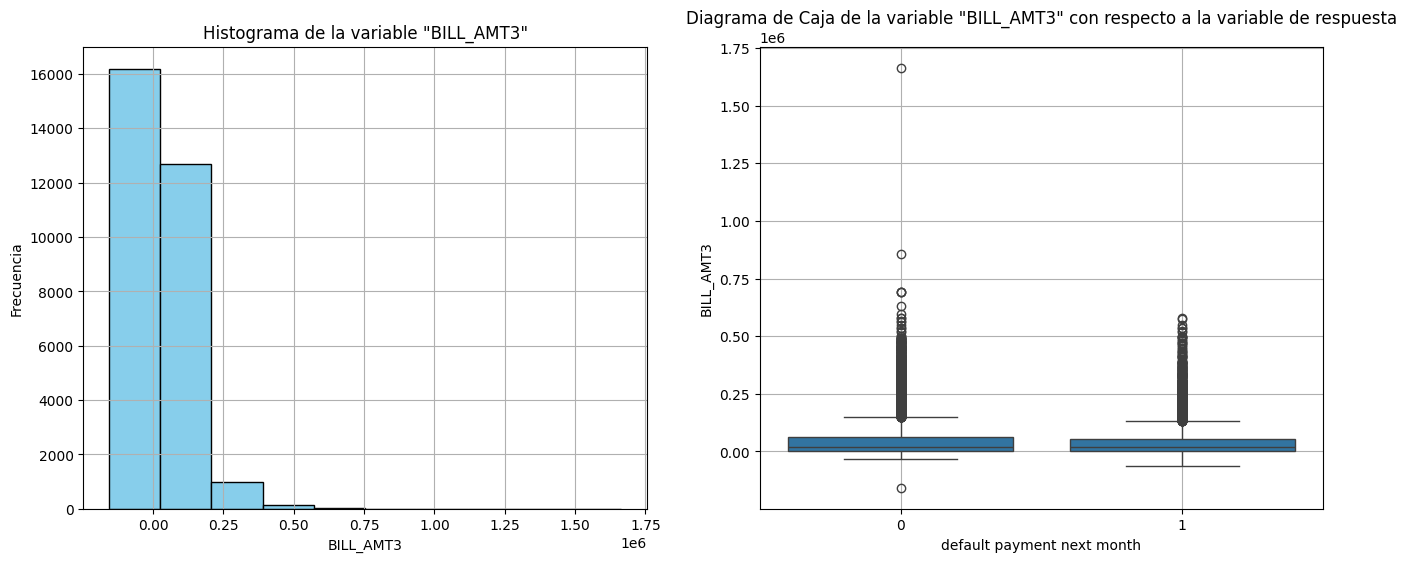

Porcentaje de valores atípicos en BILL_AMT3: 8.23 %
count     30000.000000
mean      43262.948967
std       64332.856134
min     -170000.000000
25%        2326.750000
50%       19052.000000
75%       54506.000000
max      891586.000000
Name: BILL_AMT4, dtype: float64


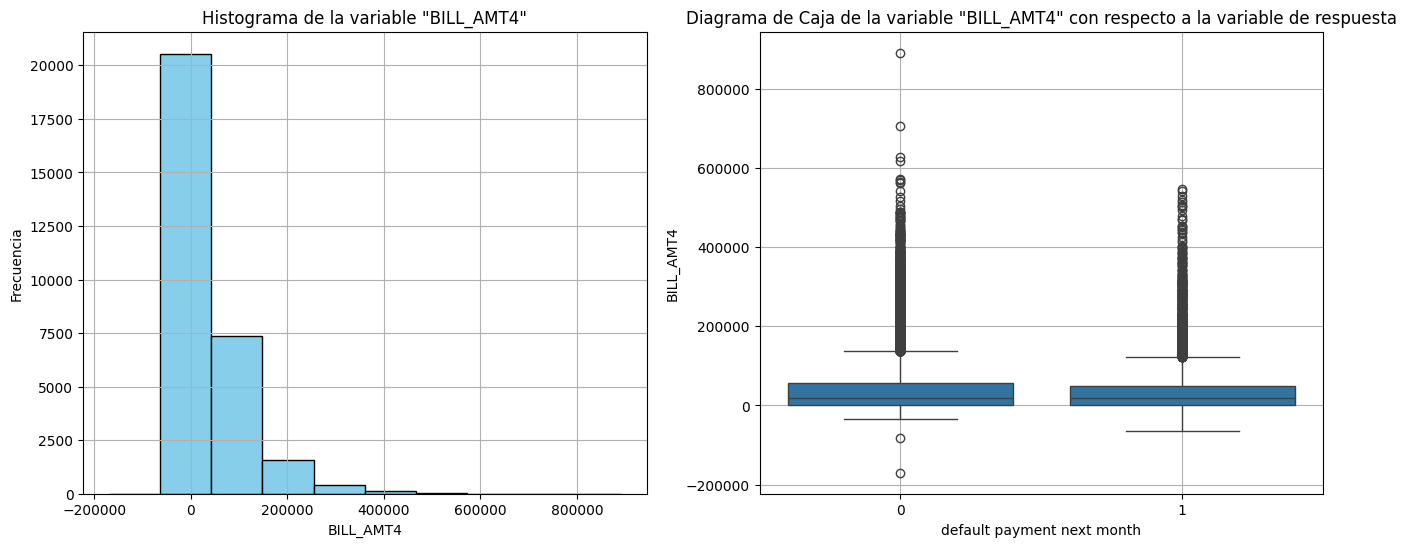

Porcentaje de valores atípicos en BILL_AMT4: 8.74 %
count     30000.000000
mean      40311.400967
std       60797.155770
min      -81334.000000
25%        1763.000000
50%       18104.500000
75%       50190.500000
max      927171.000000
Name: BILL_AMT5, dtype: float64


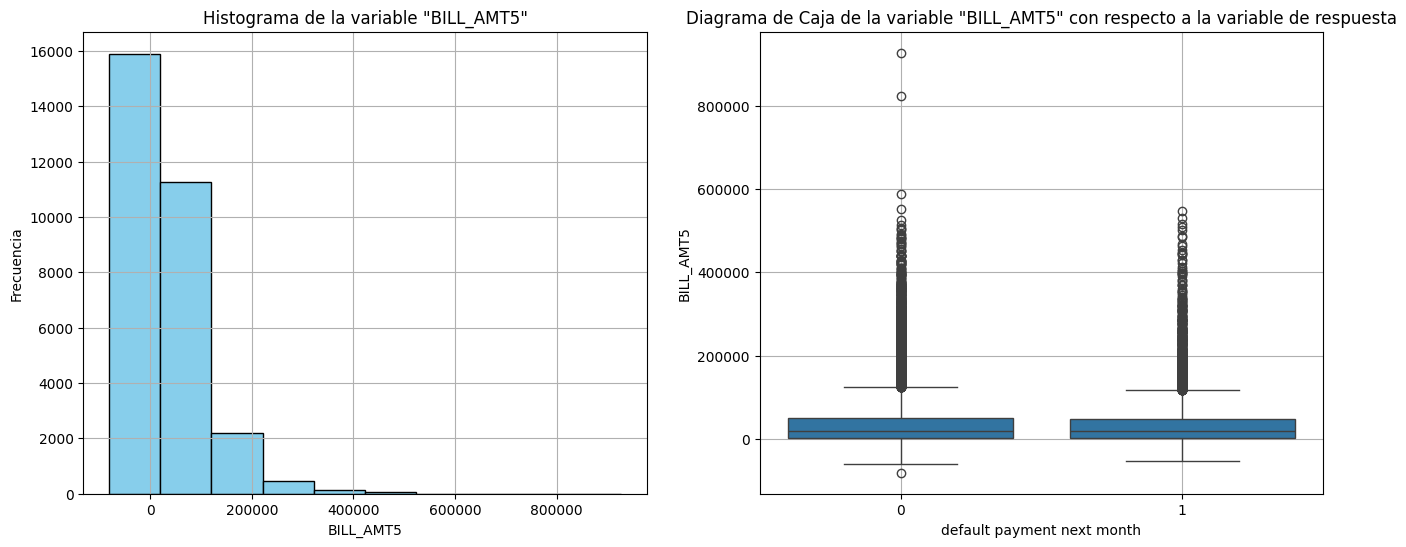

Porcentaje de valores atípicos en BILL_AMT5: 9.083333333333334 %
count     30000.000000
mean      38871.760400
std       59554.107537
min     -339603.000000
25%        1256.000000
50%       17071.000000
75%       49198.250000
max      961664.000000
Name: BILL_AMT6, dtype: float64


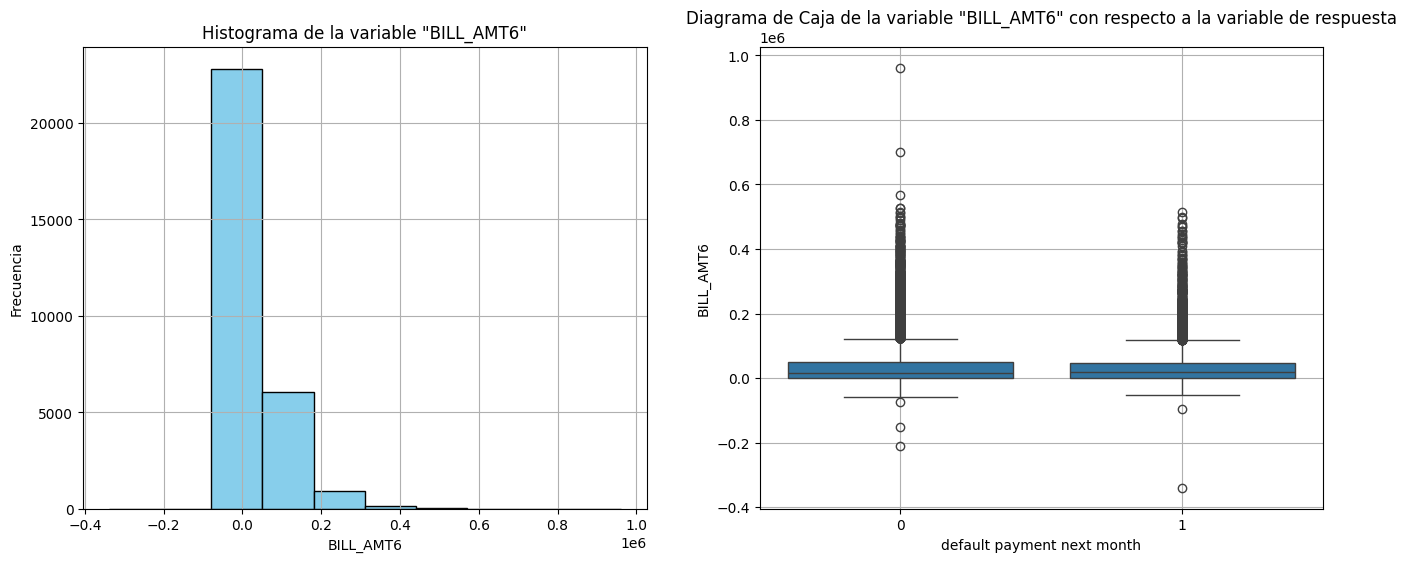

Porcentaje de valores atípicos en BILL_AMT6: 8.976666666666667 %


In [27]:
# Iterar sobre las variables 'BILL_AMT1' a 'BILL_AMT6'
bill_amt_vars = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for bill_amt_var in bill_amt_vars:
    # Descripción de la variable
    bill_amt_description = data_df[bill_amt_var].describe()
    print(bill_amt_description)

    # Histograma y Boxplot de la variable
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.hist(data_df[bill_amt_var], color='skyblue', edgecolor='black')
    plt.title(f'Histograma de la variable "{bill_amt_var}"')
    plt.xlabel(f'{bill_amt_var}')
    plt.ylabel('Frecuencia')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    sns.boxplot(x='default payment next month', y=bill_amt_var, data=data_df)
    plt.xlabel('default payment next month')
    plt.ylabel(f'{bill_amt_var}')
    plt.title(f'Diagrama de Caja de la variable "{bill_amt_var}" con respecto a la variable de respuesta')
    plt.grid(True)

    plt.show()

    # Calcular el porcentaje de valores atípicos
    Q1, Q3 = data_df[bill_amt_var].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_percentage = ((data_df[bill_amt_var] < lower_bound) | (data_df[bill_amt_var] > upper_bound)).mean() * 100

    print(f"Porcentaje de valores atípicos en {bill_amt_var}:", outliers_percentage, "%")

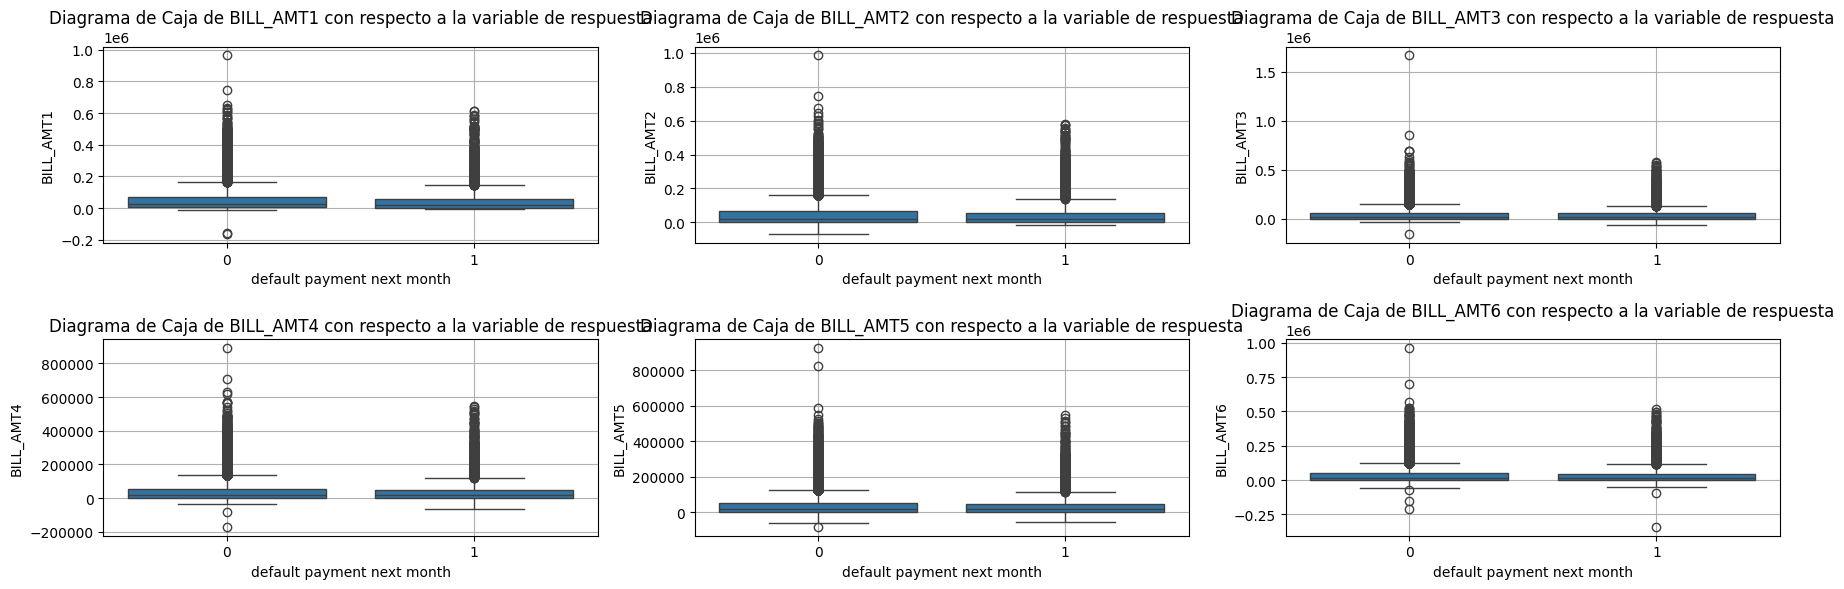

In [28]:
# Crear subplots
plt.figure(figsize=(18, 6))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    sns.boxplot(x='default payment next month', y='BILL_AMT{}'.format(i), data=data_df)
    plt.xlabel('default payment next month')
    plt.ylabel('BILL_AMT{}'.format(i))
    plt.title('Diagrama de Caja de BILL_AMT{} con respecto a la variable de respuesta'.format(i))
    plt.grid(True)

plt.tight_layout()
plt.show()

Cantidad que usario pago

count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64


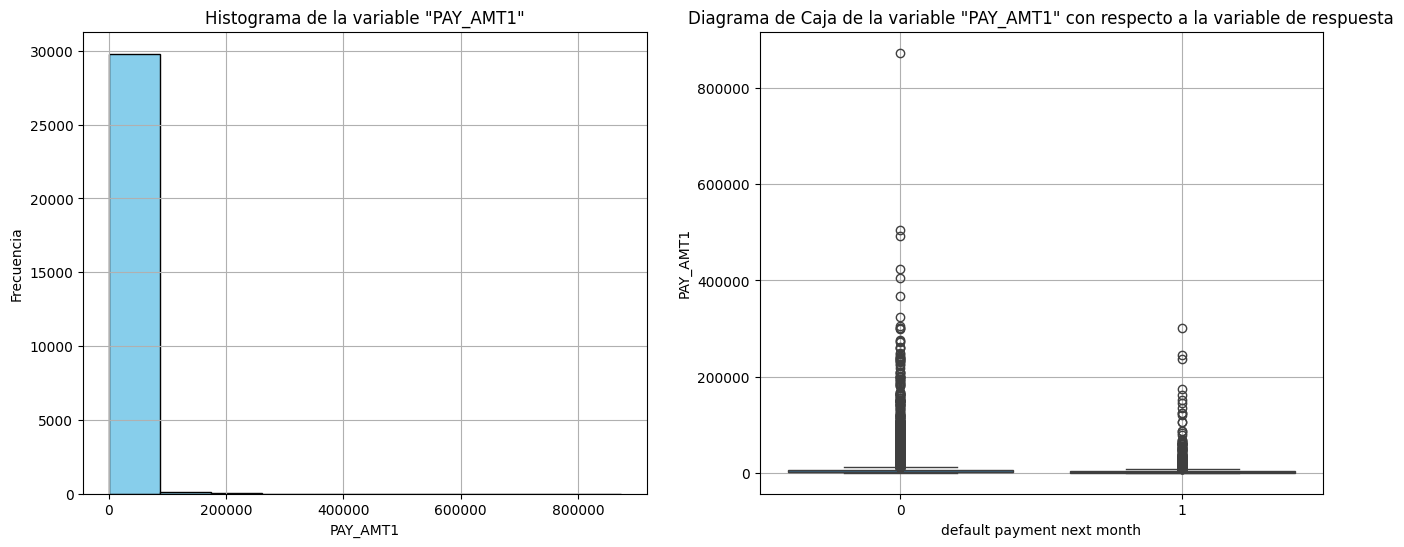

Porcentaje de valores atípicos en PAY_AMT1: 9.15 %
count    3.000000e+04
mean     5.921163e+03
std      2.304087e+04
min      0.000000e+00
25%      8.330000e+02
50%      2.009000e+03
75%      5.000000e+03
max      1.684259e+06
Name: PAY_AMT2, dtype: float64


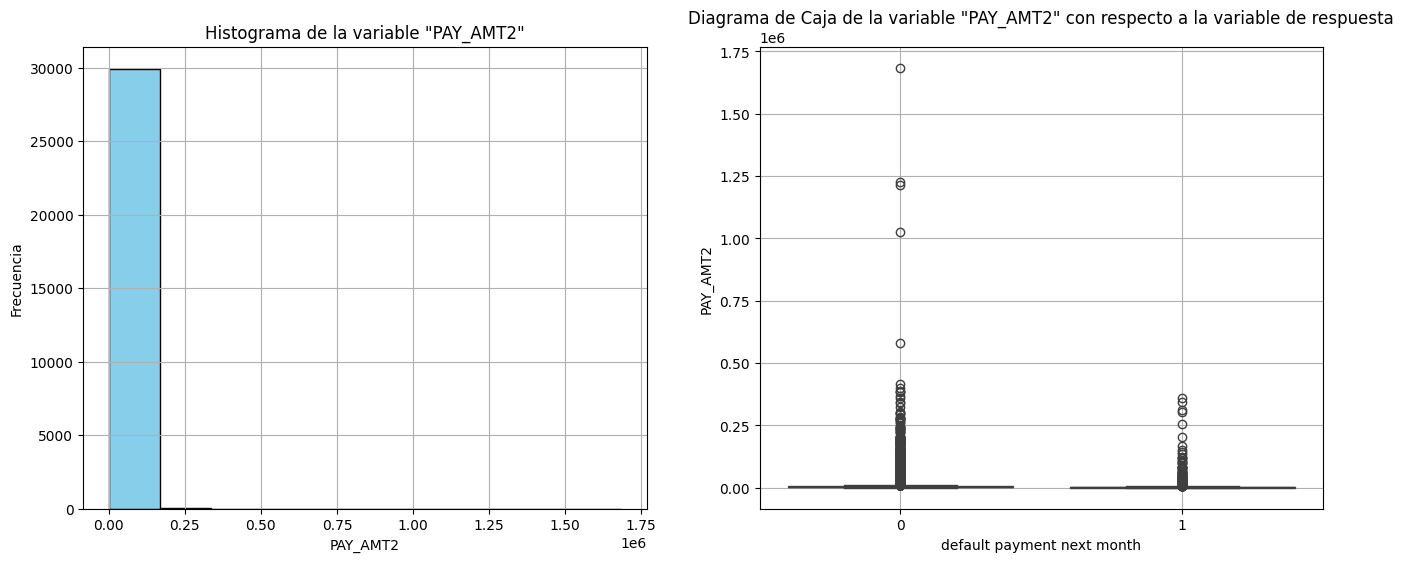

Porcentaje de valores atípicos en PAY_AMT2: 9.046666666666667 %
count     30000.00000
mean       5225.68150
std       17606.96147
min           0.00000
25%         390.00000
50%        1800.00000
75%        4505.00000
max      896040.00000
Name: PAY_AMT3, dtype: float64


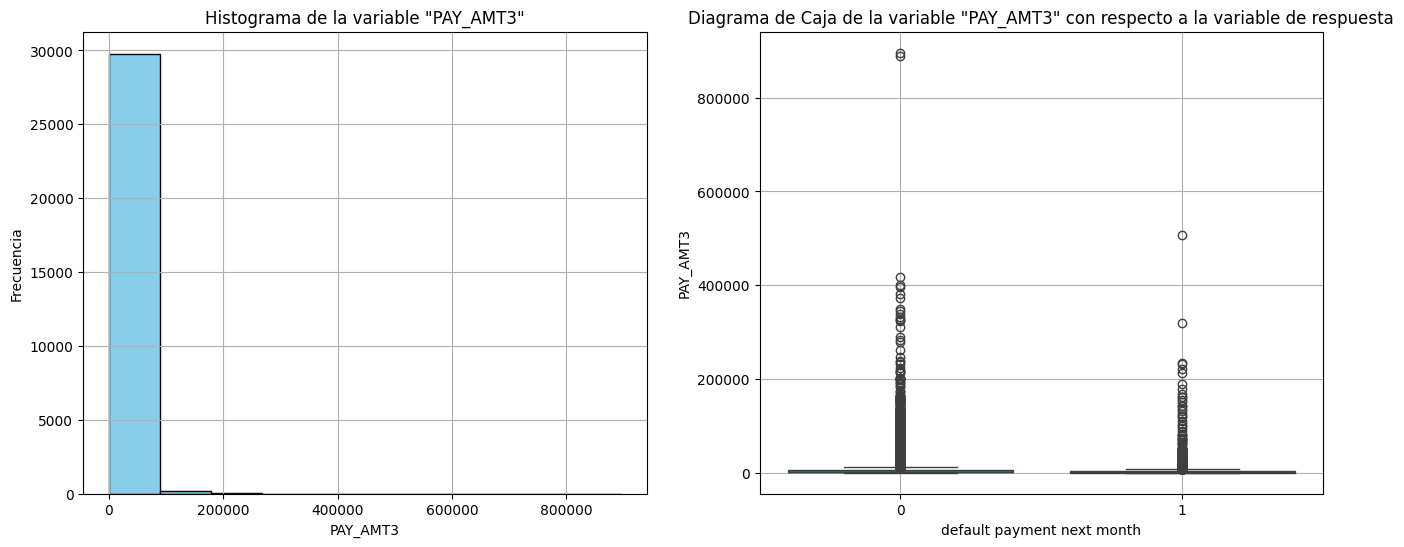

Porcentaje de valores atípicos en PAY_AMT3: 8.66 %
count     30000.000000
mean       4826.076867
std       15666.159744
min           0.000000
25%         296.000000
50%        1500.000000
75%        4013.250000
max      621000.000000
Name: PAY_AMT4, dtype: float64


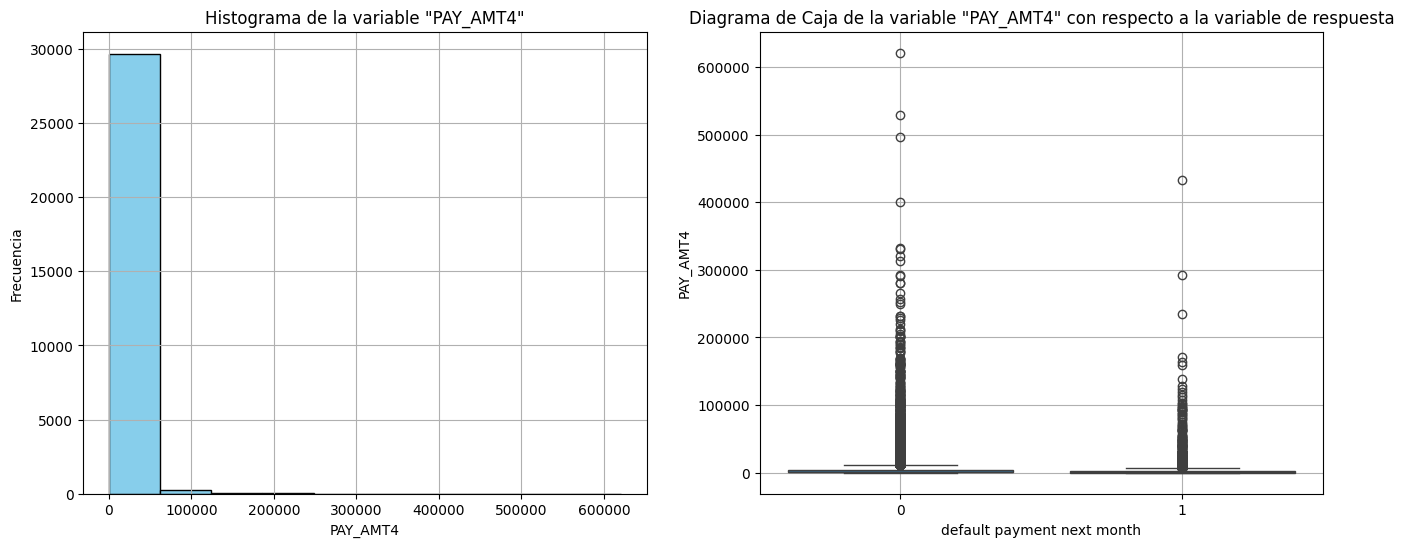

Porcentaje de valores atípicos en PAY_AMT4: 9.98 %
count     30000.000000
mean       4799.387633
std       15278.305679
min           0.000000
25%         252.500000
50%        1500.000000
75%        4031.500000
max      426529.000000
Name: PAY_AMT5, dtype: float64


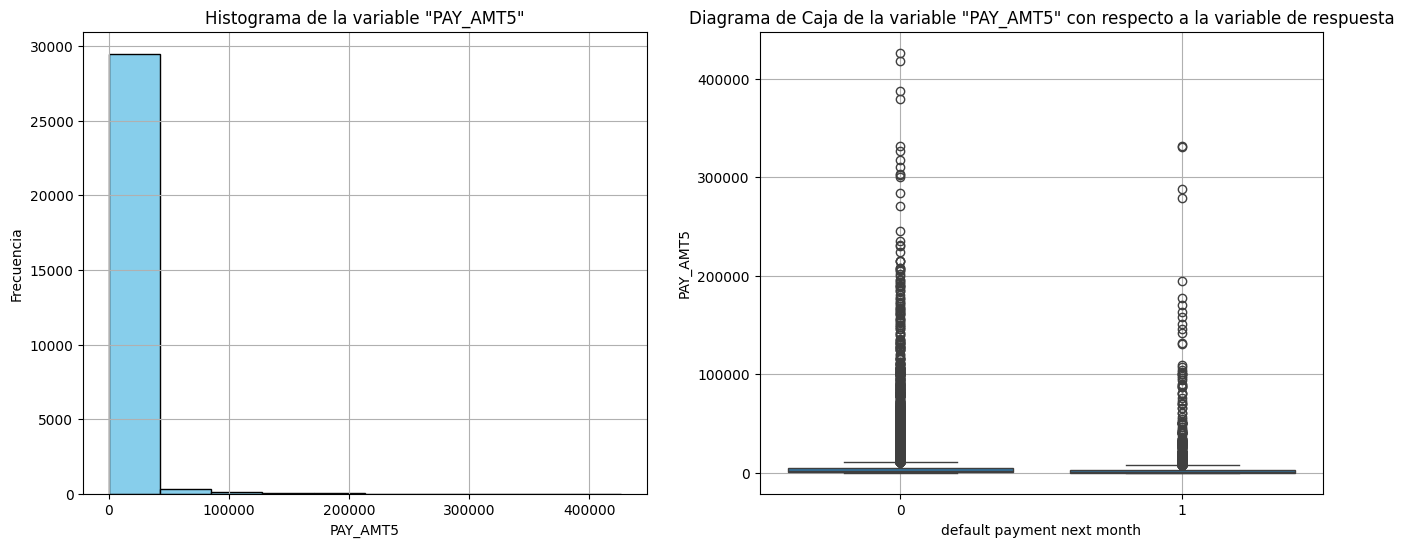

Porcentaje de valores atípicos en PAY_AMT5: 9.816666666666666 %
count     30000.000000
mean       5215.502567
std       17777.465775
min           0.000000
25%         117.750000
50%        1500.000000
75%        4000.000000
max      528666.000000
Name: PAY_AMT6, dtype: float64


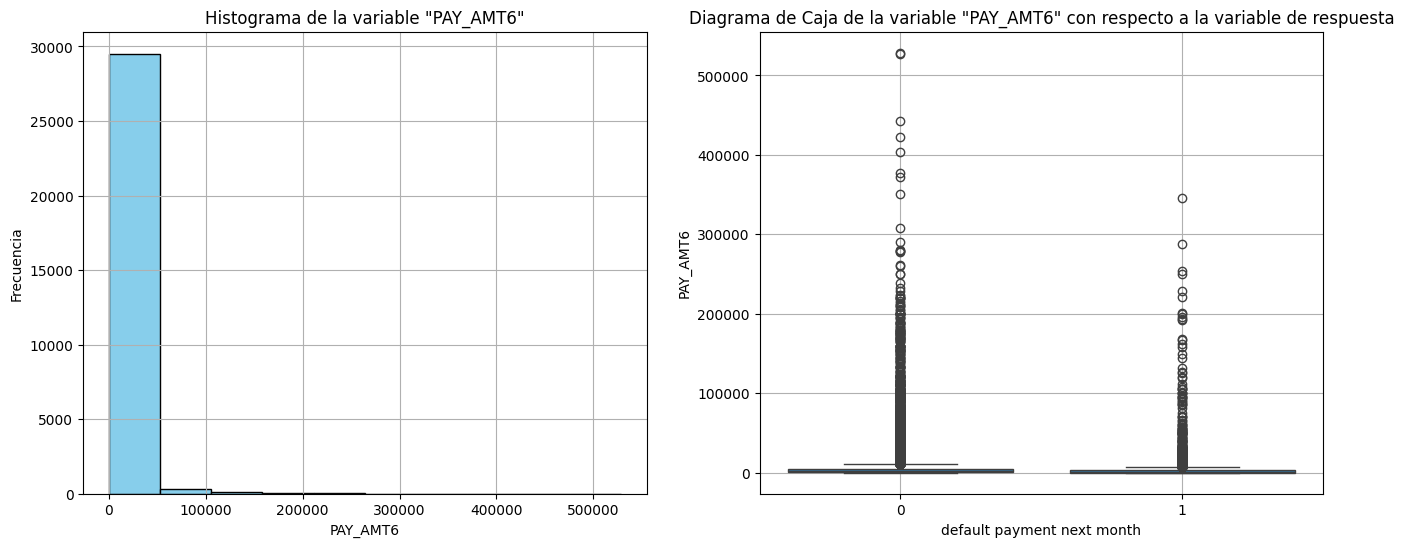

Porcentaje de valores atípicos en PAY_AMT6: 9.86 %


In [29]:
# Iterar sobre las variables 'PAY_AMT1' a 'PAY_AMT6'
pay_amt_vars = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for pay_amt_var in pay_amt_vars:
    # Descripción de la variable
    pay_amt_description = data_df[pay_amt_var].describe()
    print(pay_amt_description)

    # Histograma y Boxplot de la variable
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.hist(data_df[pay_amt_var], color='skyblue', edgecolor='black')
    plt.title(f'Histograma de la variable "{pay_amt_var}"')
    plt.xlabel(f'{pay_amt_var}')
    plt.ylabel('Frecuencia')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    sns.boxplot(x='default payment next month', y=pay_amt_var, data=data_df)
    plt.xlabel('default payment next month')
    plt.ylabel(f'{pay_amt_var}')
    plt.title(f'Diagrama de Caja de la variable "{pay_amt_var}" con respecto a la variable de respuesta')
    plt.grid(True)

    plt.show()

    # Calcular el porcentaje de valores atípicos
    Q1, Q3 = data_df[pay_amt_var].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_percentage = ((data_df[pay_amt_var] < lower_bound) | (data_df[pay_amt_var] > upper_bound)).mean() * 100

    print(f"Porcentaje de valores atípicos en {pay_amt_var}:", outliers_percentage, "%")


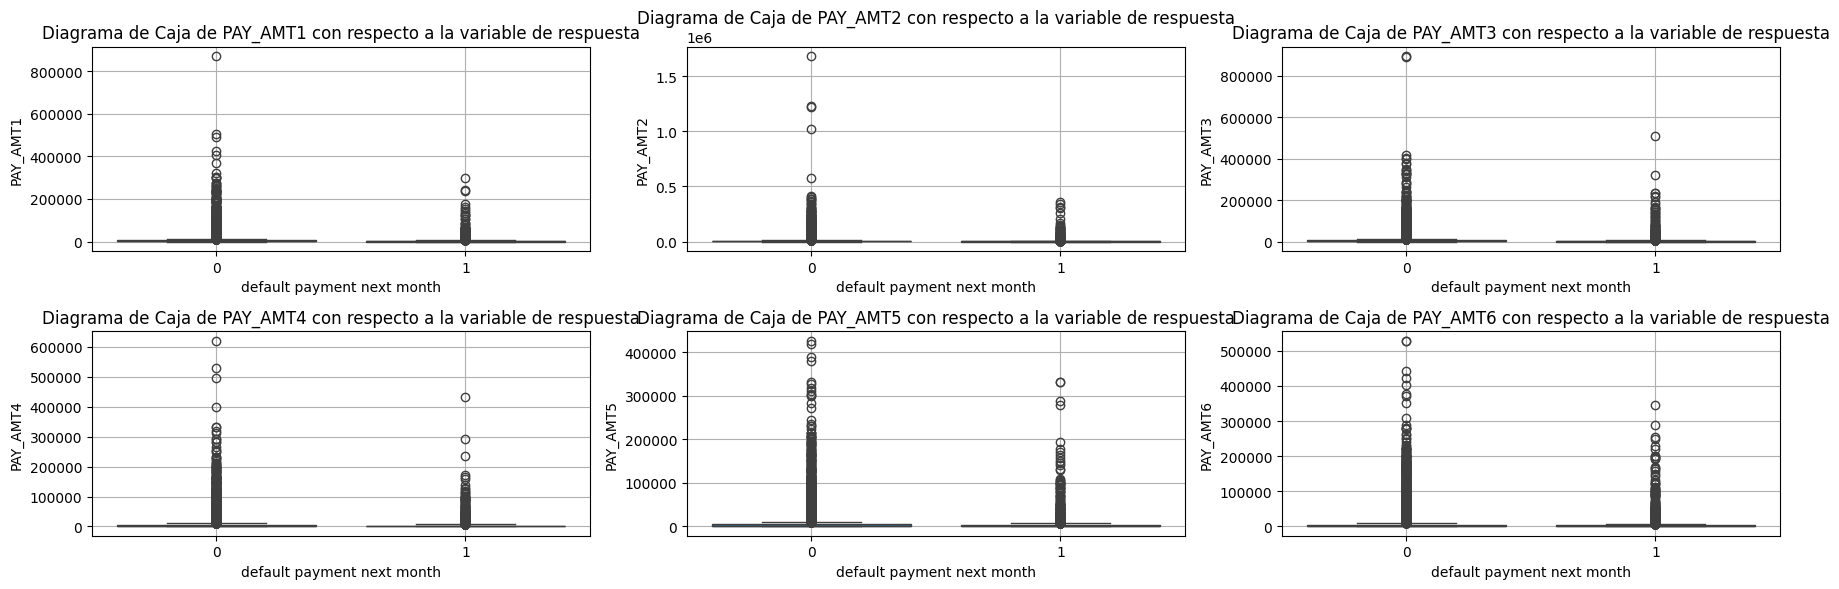

In [30]:
# Crear subplots
plt.figure(figsize=(18, 6))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    sns.boxplot(x='default payment next month', y='PAY_AMT{}'.format(i), data=data_df)
    plt.xlabel('default payment next month')
    plt.ylabel('PAY_AMT{}'.format(i))
    plt.title('Diagrama de Caja de PAY_AMT{} con respecto a la variable de respuesta'.format(i))
    plt.grid(True)

plt.tight_layout()
plt.show()

### 3.2 Análisis datos categóricos



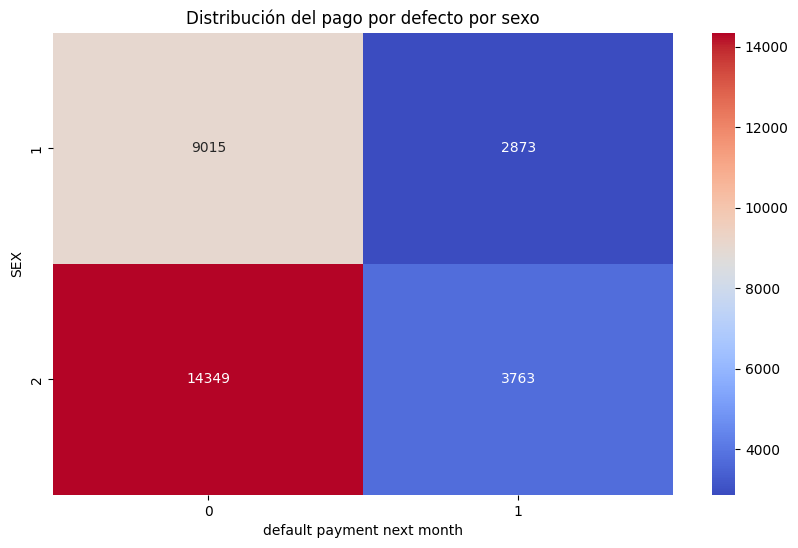

In [33]:

#FALTA DESCRIPTIVAS
# Crear una tabla pivote para contar los valores de sexo para cada valor de default payment next month
pivot_table = data_df.pivot_table(index='SEX', columns='default payment next month', aggfunc='size')

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('default payment next month')
plt.ylabel('SEX')
plt.title('Distribución del pago por defecto por sexo')
plt.show()
#1 male y 2 female 

#SON MÁS MUJERES ENTONCES LO NORMALIZAMOS??

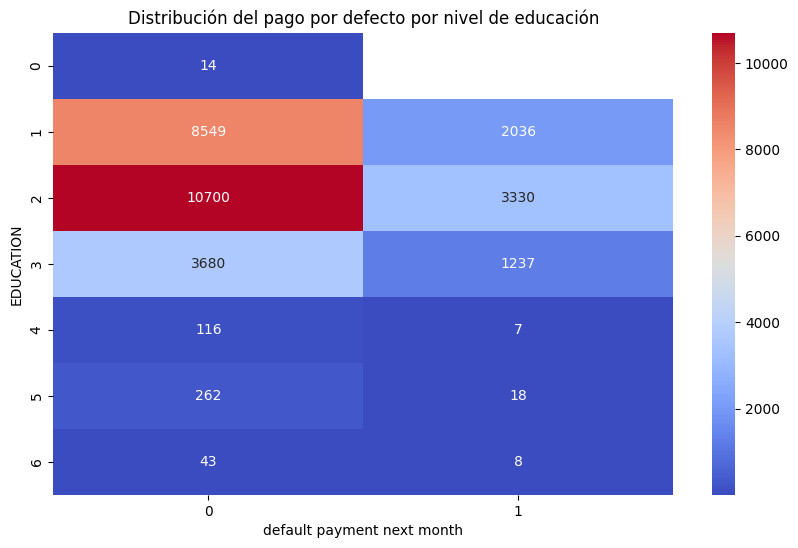

In [34]:
# Crear una tabla pivote para contar los valores de educación para cada valor de default payment next month
pivot_table_education = data_df.pivot_table(index='EDUCATION', columns='default payment next month', aggfunc='size')

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_education, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('default payment next month')
plt.ylabel('EDUCATION')
plt.title('Distribución del pago por defecto por nivel de educación')
plt.show()



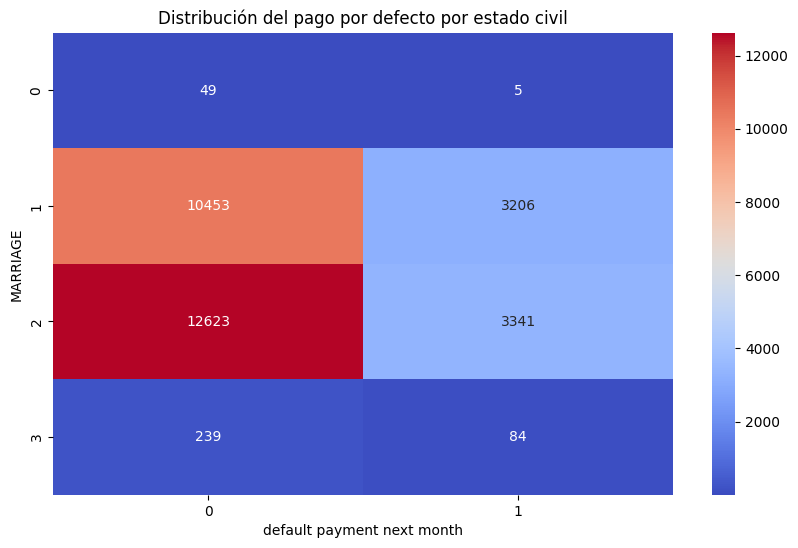

In [35]:
# Crear una tabla pivote para contar los valores de estado civil para cada valor de default payment next month
pivot_table_marriage = data_df.pivot_table(index='MARRIAGE', columns='default payment next month', aggfunc='size')

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_marriage, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('default payment next month')
plt.ylabel('MARRIAGE')
plt.title('Distribución del pago por defecto por estado civil')
plt.show()

### 3.3 Búsqueda de relaciones con la variable objetivo



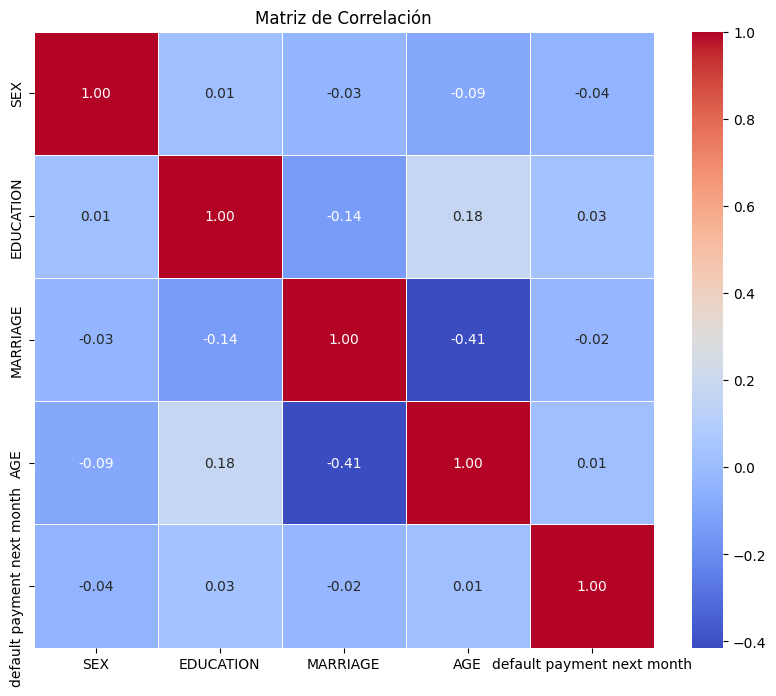

In [50]:
# Seleccionar las columnas relevantes
relevant_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'default payment next month']

# Calcular la matriz de correlación
correlation_matrix = data_df[relevant_columns].corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


##### 3.4.1 Búsqueda de relaciones entre las variables 


Correlaciones variables numéricas

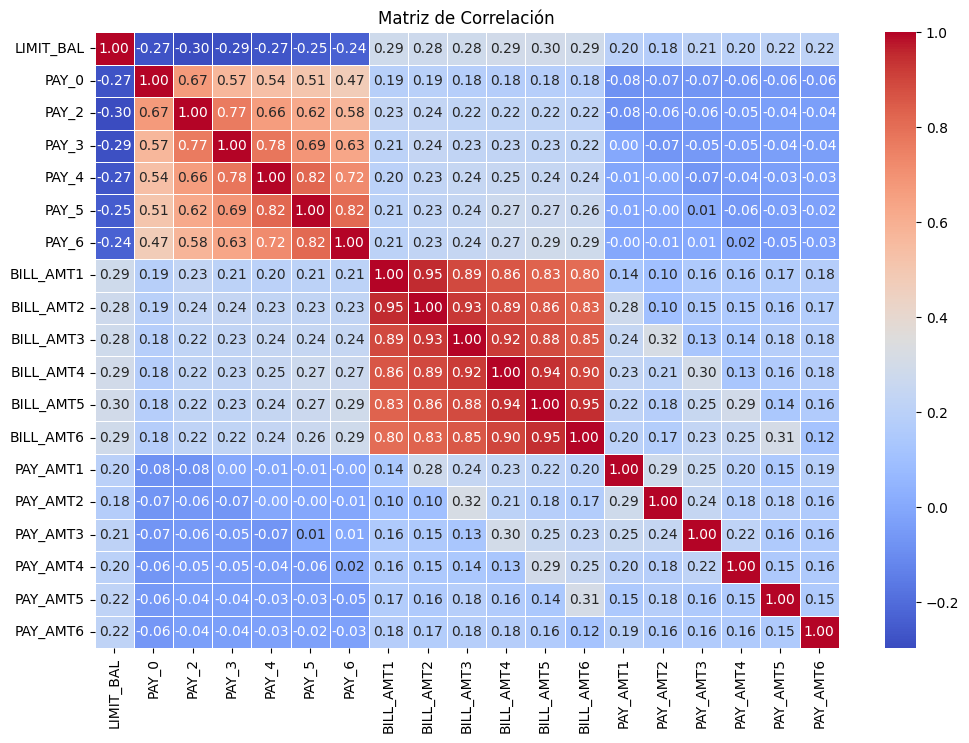

In [49]:

# Calcular la matriz de correlación
correlation_matrix = data_df[relevant_columns].corr()

# Crear un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()




De manera positiva, se puede conlcuir que no existen altas correlaciones entre las variables independientes. Esto también nos da mayores argumentos en usar modelos líneales, pues estos son extremedamentes sensibles a las dependencias lineas, y al tener un indicio de que no existen relaciones con tanta fuerza permitiria a los modelos ser más potentes.

### 3.4 Datos atipicos

Se puede observar la presencia de datos atípicos en varias variables. No obstante, para este caso, no solo se consideran datos atípicos sino inflyentes. En este orden de ideas, ningun dato outlier sera retirado del data set.


In [47]:
outliers_percentage_dict = {}

for column in data_df.columns:
    # Calcular los cuartiles Q1 y Q3
    Q1, Q3 = data_df[column].quantile([0.25, 0.75])
    
    # Calcular el rango intercuartil (IQR)
    IQR = Q3 - Q1
    
    # Calcular los límites para los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Contar el número de valores atípicos
    outliers_count = ((data_df[column] < lower_bound) | (data_df[column] > upper_bound)).sum()
    
    # Calcular el porcentaje de valores atípicos
    outliers_percentage = outliers_count / len(data_df[column]) * 100
    
    # Guardar el porcentaje de valores atípicos en un diccionario
    outliers_percentage_dict[column] = outliers_percentage

# Imprimir el porcentaje de valores atípicos para cada variable
print("Porcentaje de valores atípicos para cada variable:")
for column, percentage in outliers_percentage_dict.items():
    print(column, ":", percentage, "%")


Porcentaje de valores atípicos para cada variable:
ID : 0.0 %
LIMIT_BAL : 0.5566666666666666 %
SEX : 0.0 %
EDUCATION : 1.5133333333333334 %
MARRIAGE : 0.0 %
AGE : 0.9066666666666667 %
PAY_0 : 10.433333333333334 %
PAY_2 : 14.7 %
PAY_3 : 14.030000000000001 %
PAY_4 : 11.693333333333333 %
PAY_5 : 9.893333333333333 %
PAY_6 : 10.263333333333332 %
BILL_AMT1 : 8.0 %
BILL_AMT2 : 7.983333333333334 %
BILL_AMT3 : 8.23 %
BILL_AMT4 : 8.74 %
BILL_AMT5 : 9.083333333333334 %
BILL_AMT6 : 8.976666666666667 %
PAY_AMT1 : 9.15 %
PAY_AMT2 : 9.046666666666667 %
PAY_AMT3 : 8.66 %
PAY_AMT4 : 9.98 %
PAY_AMT5 : 9.816666666666666 %
PAY_AMT6 : 9.86 %
default payment next month : 22.12 %
